<a href="https://colab.research.google.com/github/Augustogrecco/Cursocoderhouse/blob/main/DS_19_08_2024_Grecco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly seaborn

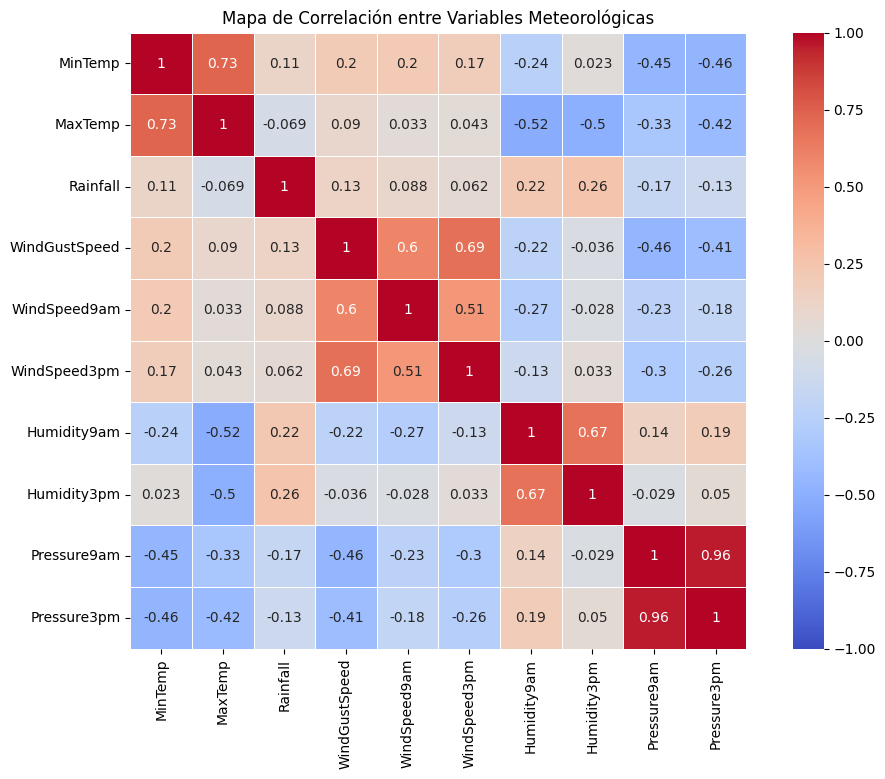

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos meteorológicos desde GitHub
url = 'https://raw.githubusercontent.com/Augustogrecco/Cursocoderhouse/main/weatherAUS.csv'
data = pd.read_csv(url, delimiter=',')

# Procesamiento de datos
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Imputación de valores faltantes
monthly_means = data.groupby(['Location', 'Month'])[['MinTemp', 'MaxTemp']].transform('mean')
data['MinTemp'].fillna(monthly_means['MinTemp'], inplace=True)
data['MaxTemp'].fillna(monthly_means['MaxTemp'], inplace=True)
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
data.drop(columns=columns_to_drop, inplace=True)
data['Rainfall'].fillna(0, inplace=True)
data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Imputación de valores faltantes para variables numéricas y categóricas
variables_to_impute = ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindGustSpeed']
monthly_means = data.groupby(['Location', 'Year', 'Month'])[variables_to_impute].transform('mean')
data[variables_to_impute] = data[variables_to_impute].fillna(monthly_means)

categorical_vars = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
mode_by_group = data.groupby(['Location', 'Year', 'Month'])[categorical_vars].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
for var in categorical_vars:
    data[var] = data.groupby(['Location', 'Year', 'Month'])[var].transform(lambda x: x.fillna(mode_by_group.loc[(x.name[0], x.name[1], x.name[2]), var]))

data_cleaned = data.dropna()

# Gráfico 1: Lluvia total por ciudad y año
rain_by_city_year = data_cleaned.groupby(['Location', 'Year'])['Rainfall'].sum().reset_index()
fig_bar = px.bar(rain_by_city_year, x='Location', y='Rainfall', color='Year',
                 labels={'Rainfall': 'Lluvia Total (mm)', 'Location': 'Ciudad'},
                 title='Lluvia Total por Ciudad y Año', barmode='group',
                 height=500)
fig_bar.update_layout(xaxis_tickangle=-45, legend_title_text='Año')
fig_bar.show()

# Gráfico 2: Gráfico de torta para la distribución 80/20 de la lluvia
rain_by_city = data_cleaned.groupby('Location')['Rainfall'].sum().reset_index()
rain_by_city['Rainfall_Percentage'] = (rain_by_city['Rainfall'] / rain_by_city['Rainfall'].sum()) * 100
rain_by_city.sort_values(by='Rainfall_Percentage', ascending=False, inplace=True)
rain_by_city['Cumulative_Percentage'] = rain_by_city['Rainfall_Percentage'].cumsum()

# Conteo de ciudades según el porcentaje de lluvia acumulada
more_than_80 = len(rain_by_city[rain_by_city['Cumulative_Percentage'] <= 80])
less_than_20 = len(rain_by_city[rain_by_city['Cumulative_Percentage'] >= 80])

labels = ['Más del 80% de Lluvia', 'Menos del 20% de Lluvia']
sizes = [more_than_80, less_than_20]
colors = ['#ff9999', '#66b3ff']

fig_pie = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.4)])
fig_pie.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                      marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig_pie.update_layout(title_text='Distribución de Ciudades según el Porcentaje de Lluvia (80/20)')
fig_pie.show()

# Gráfico 3: Box Plot para detectar outliers en las temperaturas mínimas y máximas
fig_box_min = px.box(data_cleaned, x='Location', y='MinTemp', points="outliers",
                     title='Distribución de la Temperatura Mínima por Ciudad',
                     labels={'MinTemp': 'Temperatura Mínima (°C)', 'Location': 'Ciudad'},
                     height=500)
fig_box_min.update_layout(xaxis_tickangle=-45)
fig_box_min.show()

fig_box_max = px.box(data_cleaned, x='Location', y='MaxTemp', points="outliers",
                     title='Distribución de la Temperatura Máxima por Ciudad',
                     labels={'MaxTemp': 'Temperatura Máxima (°C)', 'Location': 'Ciudad'},
                     height=500)
fig_box_max.update_layout(xaxis_tickangle=-45)
fig_box_max.show()

# Gráfico 4: Matriz de correlación utilizando Seaborn y Matplotlib
correlation_matrix = data_cleaned[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=0.5)
plt.title('Mapa de Correlación entre Variables Meteorológicas')
plt.show()



In [ ]:
import plotly.graph_objects as go

# Datos para la distribución 80/20
labels = ['Más del 80% de Lluvia', 'Menos del 20% de Lluvia']
sizes = [27, 17]  # Actualiza estos valores según tu gráfico
colors = ['#32CD32', '#007FFF']  # Verde vivo y azul Francia

# Crear el gráfico de dona
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5)])

# Actualizar trazas para mostrar el porcentaje y la cantidad en el centro
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                  texttemplate='%{label}<br>%{value} Ciudades<br>(%{percent})')

# Actualizar el layout para un diseño más moderno, sin leyenda
fig.update_layout(
    title_text='Distribución de Ciudades según el Porcentaje de Lluvia (80/20)',
    annotations=[dict(text='Ciudades', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=False  # Ocultar la leyenda
)

# Mostrar el gráfico
fig.show()


Regresión Logística:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28621
           1       0.74      0.49      0.59      8074

    accuracy                           0.85     36695
   macro avg       0.80      0.72      0.75     36695
weighted avg       0.84      0.85      0.84     36695

Matriz de Confusión:
 [[27202  1419]
 [ 4098  3976]]

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28621
           1       0.77      0.49      0.60      8074

    accuracy                           0.86     36695
   macro avg       0.82      0.73      0.76     36695
weighted avg       0.85      0.86      0.84     36695

Matriz de Confusión:
 [[27441  1180]
 [ 4091  3983]]


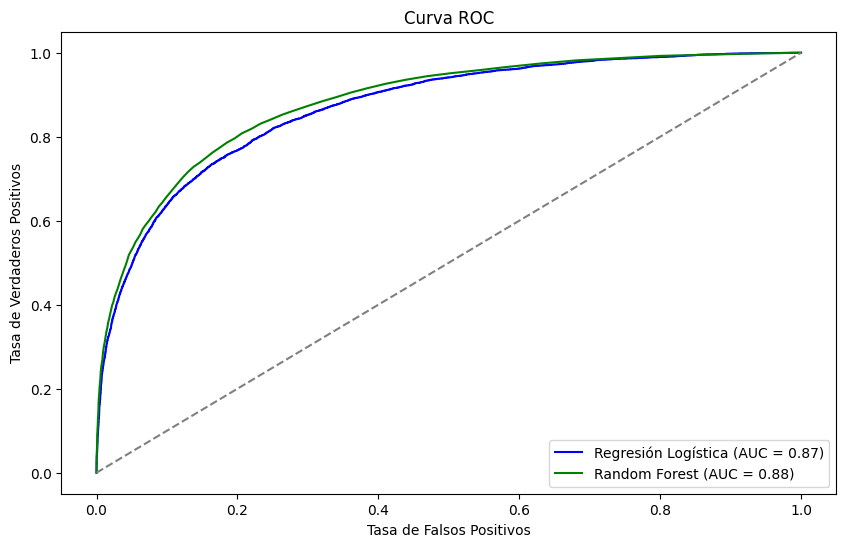

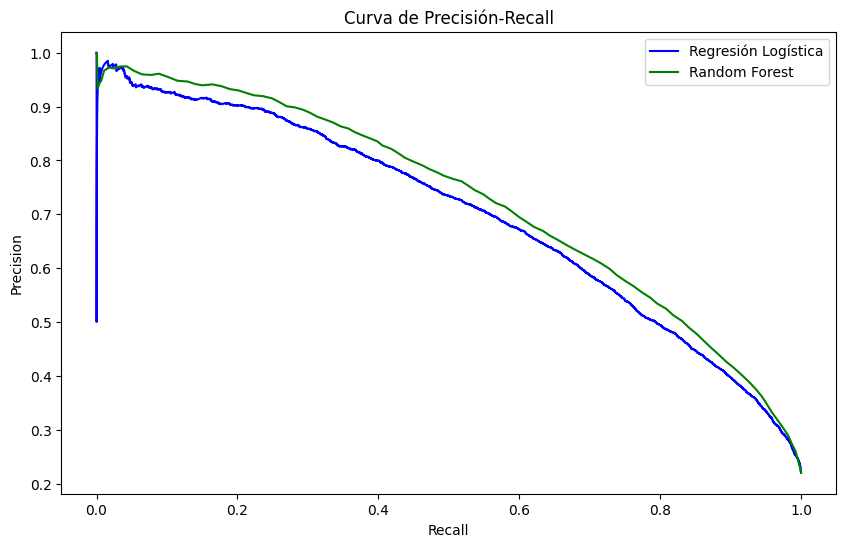

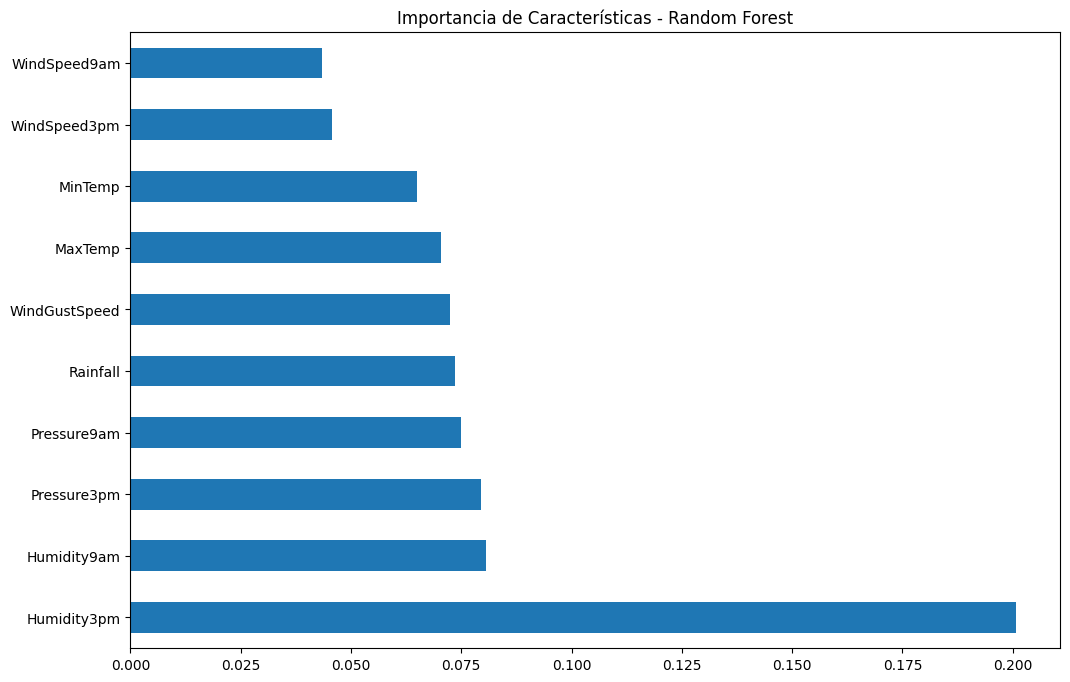

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocesamiento de datos
# Selección de características
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
            'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
            'WindGustDir', 'WindDir9am', 'WindDir3pm']
target = 'RainTomorrow'

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = data_cleaned[features]
y = data_cleaned[target].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesamiento: Codificación y escalado
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 2. Regresión Logística
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=42))])

logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

# 3. Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# 4. Evaluación de los Modelos
# Reporte de clasificación y matriz de confusión para la Regresión Logística
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logistic))

# Reporte de clasificación y matriz de confusión para Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

# 5. Curvas ROC y AUC para ambos modelos
y_pred_prob_logistic = logistic_pipeline.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', label=f'Regresión Logística (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 6. Curvas de Precisión-Recall
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_pred_prob_logistic)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall_logistic, precision_logistic, color='blue', label='Regresión Logística')
plt.plot(recall_rf, precision_rf, color='green', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc="upper right")
plt.show()

# 7. Importancia de características en Random Forest
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(12, 8))
forest_importances.nlargest(10).plot(kind='barh')
plt.title('Importancia de Características - Random Forest')
plt.show()


Hallazgos y Conclusiones
1. Desempeño General de los Modelos
Regresión Logística:
Precisión: 0.87 para la clase 0 (No llueve) y 0.74 para la clase 1 (Llueve).
Recall: 0.95 para la clase 0 y 0.49 para la clase 1.
F1-Score: 0.91 para la clase 0 y 0.59 para la clase 1.
Accuracy: 0.85
Random Forest:
Precisión: 0.87 para la clase 0 y 0.77 para la clase 1.
Recall: 0.96 para la clase 0 y 0.49 para la clase 1.
F1-Score: 0.91 para la clase 0 y 0.60 para la clase 1.
Accuracy: 0.86
2. Análisis de la Matriz de Confusión
Regresión Logística:
Clase 0 (No llueve): El modelo predice correctamente 27,202 de los 28,621 casos. Hay 1,419 falsos positivos.
Clase 1 (Llueve): El modelo predice correctamente 3,976 de los 8,074 casos. Hay 4,098 falsos negativos.
Random Forest:
Clase 0 (No llueve): El modelo predice correctamente 27,441 de los 28,621 casos. Hay 1,180 falsos positivos.
Clase 1 (Llueve): El modelo predice correctamente 3,983 de los 8,074 casos. Hay 4,091 falsos negativos.
3. Comparación entre los Modelos
Precisión y Recall:
Ambos modelos tienen un desempeño similar en términos de precisión para ambas clases.
En cuanto al recall, ambos modelos muestran una debilidad en la predicción de la clase 1 (llueve), con valores alrededor de 0.49, lo que indica que casi la mitad de los días en que llueve no son detectados correctamente.
F1-Score:
El F1-Score es ligeramente mejor en el modelo Random Forest para la clase 1 (0.60 vs 0.59 en la regresión logística).
Para la clase 0, ambos modelos tienen un F1-Score idéntico de 0.91.
Accuracy:
Ambos modelos tienen una precisión global similar, alrededor de 0.85-0.86.
4. Conclusiones
Tendencia a Predecir No Lluvia: Ambos modelos muestran una tendencia a predecir con mayor precisión los días en los que no llueve (clase 0). Esto se evidencia en el alto recall y precisión para la clase 0.
Desafío en Predecir Lluvia: Ambos modelos tienen dificultades para predecir correctamente los días en los que llueve (clase 1), como se refleja en los bajos valores de recall para la clase 1.
Random Forest vs. Regresión Logística: Aunque Random Forest muestra una ligera mejora en la precisión y el F1-Score para la clase 1, la diferencia no es significativa. La elección entre ambos modelos podría depender de la importancia de interpretabilidad (mejor en regresión logística) versus rendimiento ligeramente superior (en Random Forest).

Interpretación del Gráfico
Humidad a las 3 PM (Humidity3pm):

Esta característica es, con diferencia, la más importante en el modelo de Random Forest, lo que indica que la humedad en la tarde tiene una gran influencia en la predicción de si lloverá al día siguiente.
Humedad a las 9 AM (Humidity9am) y Presión Atmosférica (Pressure9am y Pressure3pm):

Estas características también son significativamente importantes, lo que sugiere que las condiciones atmosféricas a lo largo del día (especialmente en la mañana) son claves para predecir la lluvia.
Velocidad del Viento y Temperaturas:

La velocidad del viento (WindSpeed9am, WindSpeed3pm) y las temperaturas mínimas y máximas también contribuyen, aunque en menor medida, a las predicciones del modelo.
Lluvia Registrada (Rainfall) y Velocidad de las Ráfagas de Viento (WindGustSpeed):

Estas variables también aportan información útil, pero no son tan decisivas como la humedad y la presión.

Vamos a reducir la dimensionalidad para poder probar opciones que puedan mejorar el rendimiento. Actualmente intentamos modelos y el entrenamiento demora 2 horas, lo cual no es funcional, dentro del proyecto.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Estandarización de las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# 2. Aplicar PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Mostrar la cantidad de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Suma de la varianza explicada: {sum(explained_variance)}")

# 3. Entrenar de nuevo los modelos con los datos reducidos
# a. Regresión Logística
logistic_pipeline_pca = Pipeline(steps=[('classifier', LogisticRegression(random_state=42))])
logistic_pipeline_pca.fit(X_train_pca, y_train)
y_pred_logistic_pca = logistic_pipeline_pca.predict(X_test_pca)

# b. Random Forest
rf_pipeline_pca = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pipeline_pca.predict(X_test_pca)

# 4. Evaluación de los Modelos con PCA
print("Resultados después de aplicar PCA:")

# Regresión Logística
print("\nRegresión Logística:")
print(classification_report(y_test, y_pred_logistic_pca))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logistic_pca))

# Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf_pca))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_pca))


Varianza explicada por cada componente: [0.3489673  0.20959927 0.15891187 0.08877223 0.07682411 0.04982242
 0.02843079]
Suma de la varianza explicada: 0.9613279909199767
Resultados después de aplicar PCA:

Regresión Logística:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28621
           1       0.71      0.43      0.54      8074

    accuracy                           0.84     36695
   macro avg       0.79      0.69      0.72     36695
weighted avg       0.82      0.84      0.82     36695

Matriz de Confusión:
 [[27225  1396]
 [ 4582  3492]]

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28621
           1       0.71      0.47      0.56      8074

    accuracy                           0.84     36695
   macro avg       0.79      0.71      0.73     36695
weighted avg       0.83      0.84      0.83     36695

Matriz de Confusión:
 [[27117  1504]
 [ 4319  3755

Conclusiones:
Ambos modelos muestran un desempeño similar en términos de precisión y recall después de la reducción de dimensionalidad con PCA. Sin embargo, Random Forest tiene un leve incremento en la capacidad de detectar días lluviosos (clase 1), aunque aún queda margen de mejora en este aspecto.
La precisión global de los modelos es bastante sólida (0.84), aunque siguen predominando las predicciones correctas para días sin lluvia sobre las de días lluviosos.

Ahora voy a aplicar técnicas más complejas para debatir el modelo.

Gradient Boosting Machine (XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     28621
           1       0.71      0.48      0.57      8074

    accuracy                           0.84     36695
   macro avg       0.79      0.71      0.74     36695
weighted avg       0.83      0.84      0.83     36695

Matriz de Confusión:
 [[27056  1565]
 [ 4212  3862]]

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     28621
           1       0.77      0.41      0.54      8074

    accuracy                           0.84     36695
   macro avg       0.81      0.69      0.72     36695
weighted avg       0.84      0.84      0.83     36695

Matriz de Confusión:
 [[27638   983]
 [ 4739  3335]]

K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     28621
           1       0.65      0.46  

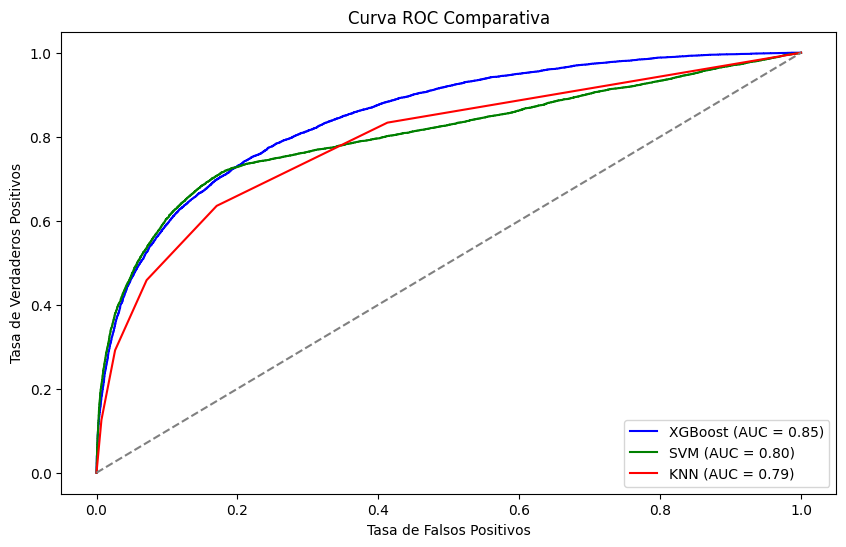

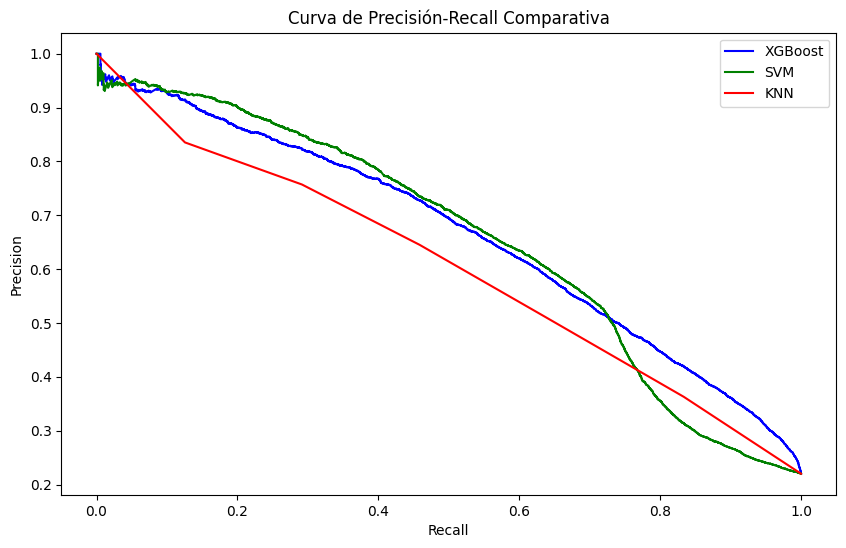

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Gradient Boosting Machine (XGBoost)
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_pca, y_train)
y_pred_xgb = xgb.predict(X_test_pca)
y_pred_prob_xgb = xgb.predict_proba(X_test_pca)[:, 1]

# 2. Support Vector Machine (SVM)
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train_pca, y_train)
y_pred_svc = svc.predict(X_test_pca)
y_pred_prob_svc = svc.predict_proba(X_test_pca)[:, 1]

# 3. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
y_pred_prob_knn = knn.predict_proba(X_test_pca)[:, 1]

# Evaluación de los Modelos
print("Gradient Boosting Machine (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svc))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svc))

print("\nK-Nearest Neighbors (KNN):")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))

# Curvas ROC y AUC para los tres modelos
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svc, tpr_svc, color='green', label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()

# Curvas de Precisión-Recall para los tres modelos
from sklearn.metrics import precision_recall_curve

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_pred_prob_svc)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', label='XGBoost')
plt.plot(recall_svc, precision_svc, color='green', label='SVM')
plt.plot(recall_knn, precision_knn, color='red', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall Comparativa')
plt.legend(loc="upper right")
plt.show()
